In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from datetime import datetime
from collections import Counter
import math

In [14]:
path = "test.csv"
df = pd.read_csv(path)
# df.dropna(subset=['rain_sum (mm)'], axis=0, inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['id','index'],inplace=True)
df.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),elevation,city
0,2021-08-02,32.3,25.3,38.2,29.6,2021-08-02T05:39,2021-08-02T17:30,20.79,0.0,7.6,16.9,134.0,4.45,0,su
1,2021-08-03,31.7,25.5,37.4,30.3,2021-08-03T05:39,2021-08-03T17:30,20.01,0.0,10.2,21.6,131.0,4.32,0,su
2,2021-08-04,32.6,25.7,37.1,30.8,2021-08-04T05:39,2021-08-04T17:30,20.89,0.0,17.3,32.4,116.0,4.73,0,su
3,2021-08-05,32.0,25.7,36.8,31.1,2021-08-05T05:39,2021-08-05T17:30,22.19,0.0,15.8,29.2,115.0,4.96,0,su
4,2021-08-06,31.9,26.3,36.0,31.6,2021-08-06T05:38,2021-08-06T17:30,21.84,0.0,20.2,36.7,106.0,4.99,0,su


In [16]:
uniqcity = Counter(df.city)
mapping = {}
for i,city in enumerate(uniqcity):
    mapping[city] = i
colorlist = list(map(mapping.get, df.city))

In [17]:
df.isnull().values.any()

False

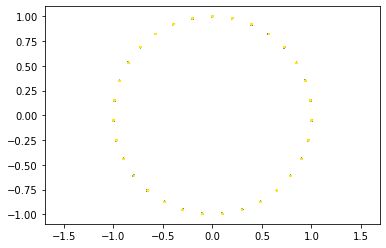

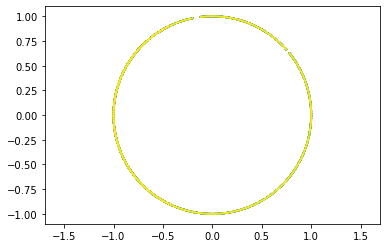

In [18]:
cols = df.columns
df[cols[0]] = df[cols[0]].astype('string')
#encode date
yearis = []
monthis = []
dayis = []
for row in df.index :
    yearis.append(int(df[cols[0]][row].split('-')[0]))
    monthis.append(int(df[cols[0]][row].split('-')[1]))
    dayis.append(int(df[cols[0]][row].split('-')[2])) 

min(yearis),min(monthis),min(dayis)
mincount  = min(yearis)*365 + min(monthis)*30 + min(dayis)*1

daysince = []
for row in df.index :
    dateval = yearis[row]*365 + monthis[row]*30 + dayis[row]*1
    datecount = dateval-mincount
    daysince.append(datecount)

maxday = max(dayis)
maxdmo = max(dayis)*max(monthis)
dayval = pd.Series(daysince)

sinday = np.sin(2*np.pi*dayval/maxday)
cosday = np.cos(2*np.pi*dayval/maxday)
sindmo = np.sin(2*np.pi*dayval/maxdmo)
cosdmo = np.cos(2*np.pi*dayval/maxdmo)

plt.scatter(sinday,cosday,c=colorlist,s=1)
plt.axis('equal')
plt.show()
plt.scatter(sindmo,cosdmo,c=colorlist,s=1)
plt.axis('equal')
plt.show()

In [19]:
dateset = pd.DataFrame({'daysince': daysince, 'sinday': sinday, 'cosday': cosday, 'sindmo': sindmo, 'cosdmo': cosdmo, 'year' : yearis})

In [20]:
rise = df['sunrise (iso8601)']
set = df['sunset (iso8601)']
#encode rise and set
riseencode = []
setencode = []
validrise = []
validset = []

risehour = []
risemin = []
riseval = []
sethour = []
setmin = []
setval = []

for row in df.index :
    riseencode.append(datetime.fromisoformat(rise[row]).strftime("%m:%d:%Y:%H:%M:%S"))
    setencode.append(datetime.fromisoformat(set[row]).strftime("%m:%d:%Y:%H:%M:%S"))
    validrise.append(True) if '01:01:1970' in riseencode[row] else validrise.append(False)
    validset.append(True) if '01:01:1970' in setencode[row] else validset.append(False)

    if validrise[row] == False :
        riseencode[row] = riseencode[row][-8:].split(':')
    else :
        riseencode[row] = '00:00:00'.split(':')

    if validset[row] == False :
        setencode[row] = setencode[row][-8:].split(':')
    else :
        setencode[row] = '00:00:00'.split(':')
    
    risehour.append(int(riseencode[row][0]))
    risemin.append(int(riseencode[row][1]))

    sethour.append(int(setencode[row][0]))
    setmin.append(int(setencode[row][1]))

    riseval.append(risehour[row]*60 + risemin[row])
    setval.append(sethour[row]*60 + setmin[row])

In [21]:
index_range = df.loc[df['city'] == 'q'].index
validnum = sum(map(lambda x: riseval[x] != 0, index_range))

avgrise = sum(riseval[min(index_range):max(index_range)])//validnum
avgset = sum(setval[min(index_range):max(index_range)])//validnum

for row in df.index :
    riseval[row] = avgrise if riseval[row] == 0 else riseval[row]
    setval[row] = avgset if setval[row] == 0 else setval[row]

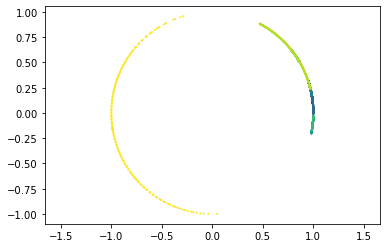

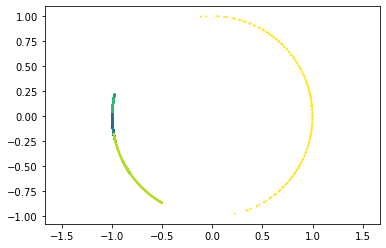

In [22]:
minperday = 24*60
riseval = pd.Series(riseval)
setval = pd.Series(setval)

sinrise = np.sin(2*np.pi*riseval/minperday)
cosrise = np.cos(2*np.pi*riseval/minperday)
sinset = np.sin(2*np.pi*setval/minperday)
cosset = np.cos(2*np.pi*setval/minperday)

plt.scatter(sinrise,cosrise,c=colorlist,s=1)
plt.axis('equal')
plt.show()
plt.scatter(sinset,cosset,c=colorlist,s=1)
plt.axis('equal')
plt.show()

In [23]:
riseset = pd.DataFrame({'sinrise': sinrise, 'cosrise': cosrise, 'sinset': sinset, 'cosset': cosset })
addset = dateset.join(riseset)
addset

,daysince,sinday,cosday,sindmo,cosdmo,year,sinrise,cosrise,sinset,cosset
0,211,-9.377521e-01,0.347305,-0.409820,-0.912166,2021,0.995805,0.091502,-0.991445,-0.130526
1,212,-8.486443e-01,0.528964,-0.425168,-0.905115,2021,0.995805,0.091502,-0.991445,-0.130526
2,213,-7.247928e-01,0.688967,-0.440394,-0.897805,2021,0.995805,0.091502,-0.991445,-0.130526
3,214,-5.712682e-01,0.820763,-0.455495,-0.890238,2021,0.995805,0.091502,-0.991445,-0.130526
4,215,-3.943559e-01,0.918958,-0.470465,-0.882418,2021,0.995396,0.095846,-0.991445,-0.130526
...,...,...,...,...,...,...,...,...,...,...
4967,712,-2.012985e-01,0.979530,-0.514555,0.857457,2022,-0.987688,-0.156434,0.994522,0.104528
4968,713,-1.273880e-14,1.000000,-0.500000,0.866025,2022,-0.987688,-0.156434,0.994522,0.104528
4969,714,2.012985e-01,0.979530,-0.485302,0.874347,2022,-0.987688,-0.156434,0.994522,0.104528
4970,715,3.943559e-01,0.918958,-0.470465,0.882418,2022,-0.987688,-0.156434,0.994522,0.104528


In [26]:
newdf = df
newdf = pd.concat([newdf.drop(columns=['time','sunrise (iso8601)','sunset (iso8601)']), addset],axis=1)
newdf = pd.get_dummies(newdf, columns=['city'])
newdf.head()

,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),shortwave_radiation_sum (MJ/m²),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),...,city_b,city_le,city_lh,city_p,city_q,city_sa,city_si,city_su,city_t,city_u
0,32.3,25.3,38.2,29.6,20.79,0.0,7.6,16.9,134.0,4.45,...,0,0,0,0,0,0,0,1,0,0
1,31.7,25.5,37.4,30.3,20.01,0.0,10.2,21.6,131.0,4.32,...,0,0,0,0,0,0,0,1,0,0
2,32.6,25.7,37.1,30.8,20.89,0.0,17.3,32.4,116.0,4.73,...,0,0,0,0,0,0,0,1,0,0
3,32.0,25.7,36.8,31.1,22.19,0.0,15.8,29.2,115.0,4.96,...,0,0,0,0,0,0,0,1,0,0
4,31.9,26.3,36.0,31.6,21.84,0.0,20.2,36.7,106.0,4.99,...,0,0,0,0,0,0,0,1,0,0


In [27]:
# newdf.to_csv('proctest2.csv')